In [47]:
# Define transitions
transitions = [
    ("Proc_M", "Evict", "Send(PutM, Home)", "Proc_MI_A"),
    ("Proc_S", "Evict", "Send(PutS, Home)", "Proc_SI_A"),
    ("Proc_M", "Self-downgrade", "Send(PutMS, Home)", "Proc_MS_A"),
    ("Proc_S", "Store", "Send(GetM, Home)", "Proc_SM_D"),
    ("Proc_I", "Store", "Send(GetM, Home)", "Proc_IM_D"),
    ("Proc_I", "Load", "Send(GetS, Home)", "Proc_IS_D"),
    ("Proc_I", "Inv", "Send(Inv, pnxt)", "Proc_I"),
    ("Proc_IS_D", "Inv", "Stall", "Proc_IS_D"),
    ("Proc_IS_D", "Data", "Update pval", "Proc_S"),
    ("Proc_IS_D", "DNAck", "", "Proc_I"),
    ("Proc_IM_D", "Inv", "Send(Inv, pnxt)", "Proc_IM_D"),
    ("Proc_IM_D", "FwdGetS", "Stall", "Proc_IM_D"),
    ("Proc_IM_D", "FwdGetM", "Stall", "Proc_IM_D"),
    ("Proc_IM_D", "Data from HomeDir, ack_cnt=0", "Send(Inv, pnxt)", "Proc_M"),
    ("Proc_IM_D", "Data from HomeDir, ack_cnt>0", "Start CMI chain, Send(Inv, pnxt)", "Proc_IM_A"),
    ("Proc_IM_D", "Data from Previous Owner", "Update pval", "Proc_M"),
    ("Proc_IM_A", "FwdGetS", "Stall", "Proc_IM_A"),
    ("Proc_IM_A", "FwdGetM", "Stall", "Proc_IM_A"),
    ("Proc_IM_A", "Inv", "Send(InvAck, HomeDir)", "Proc_M"),
    ("Proc_S", "Inv", "Send(Inv, pnxt)", "Proc_I"),
    ("Proc_SM_D", "FwdGetS", "Stall", "Proc_SM_D"),
    ("Proc_SM_D", "FwdGetM", "Stall", "Proc_SM_D"),
    ("Proc_SM_D", "Inv", "Send(Inv, pnxt)", "Proc_IM_D"),
    ("Proc_SM_D", "Data, ack_cnt=0", "Send(Inv, pnxt)", "Proc_M"),
    ("Proc_SM_D", "Data, ack_cnt>0", "Start CMI chain, Send(Inv, pnxt)", "Proc_SM_A"),
    ("Proc_SM_A", "FwdGetS", "Stall", "Proc_SM_A"),
    ("Proc_SM_A", "FwdGetM", "Stall", "Proc_SM_A"),
    ("Proc_SM_A", "Inv", "Send(InvAck, HomeDir)", "Proc_M"),
    ("Proc_M", "Inv", "Send(Inv, pnxt)", "Proc_M"),
    ("Proc_M", "FwdGetS", "Send(FwdAck, HomeDir); Send(Data, fwd)", "Proc_S"),
    ("Proc_M", "FwdGetM", "Send(Data, fwd); Send(FwdAck, HomeDir)", "Proc_I"),
    ("Proc_MS_A", "Inv", "Send(Inv, pnxt)", "Proc_MS_A"),
    ("Proc_MS_A", "FwdGetS", "Send(Data, fwd)", "Proc_MS_A"),
    ("Proc_MS_A", "FwdGetM", "Send(Data, fwd)", "Proc_MI_A"),
    ("Proc_MS_A", "PutAck", "", "Proc_S"),
    ("Proc_MI_A", "Inv", "Send(Inv, pnxt)", "Proc_MI_A"),
    ("Proc_MI_A", "FwdGetS", "Send(FwdAck, HomeDir); Send(Data, fwd)", "Proc_SI_A"),
    ("Proc_MI_A", "FwdGetM", "Send(Data, fwd); Send(FwdAck, HomeDir)", "Proc_II_A"),
    ("Proc_MI_A", "PutAck", "", "Proc_I"),
    ("Proc_SI_A", "Inv", "Send(Inv, pnxt)", "Proc_II_A"),
    ("Proc_SI_A", "PutAck", "", "Proc_I"),
    ("Proc_II_A", "Inv", "Send(Inv, pnxt)", "Proc_II_A"),
    ("Proc_II_A", "PutAck", "", "Proc_I"),
]

In [48]:
from graphviz import Digraph

# Initialize the graph
dot = Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='circle')

# Define states
states = [
    "Proc_I", "Proc_IS_D", "Proc_IM_D", "Proc_IM_A", "Proc_S",
    "Proc_SM_D", "Proc_SM_A", "Proc_M", "Proc_MS_A", "Proc_MI_A",
    "Proc_SI_A", "Proc_II_A"
]

# Add nodes
for state in states:
    dot.node(state)

# Add edges
for prev_state, msg_type, send_action, next_state in transitions:
    label = f"{msg_type} / {send_action}"
    dot.edge(prev_state, next_state, label)

# Render the graph
dot.render("state_transition_visualizer", cleanup=True)


'state_transition_visualizer.png'

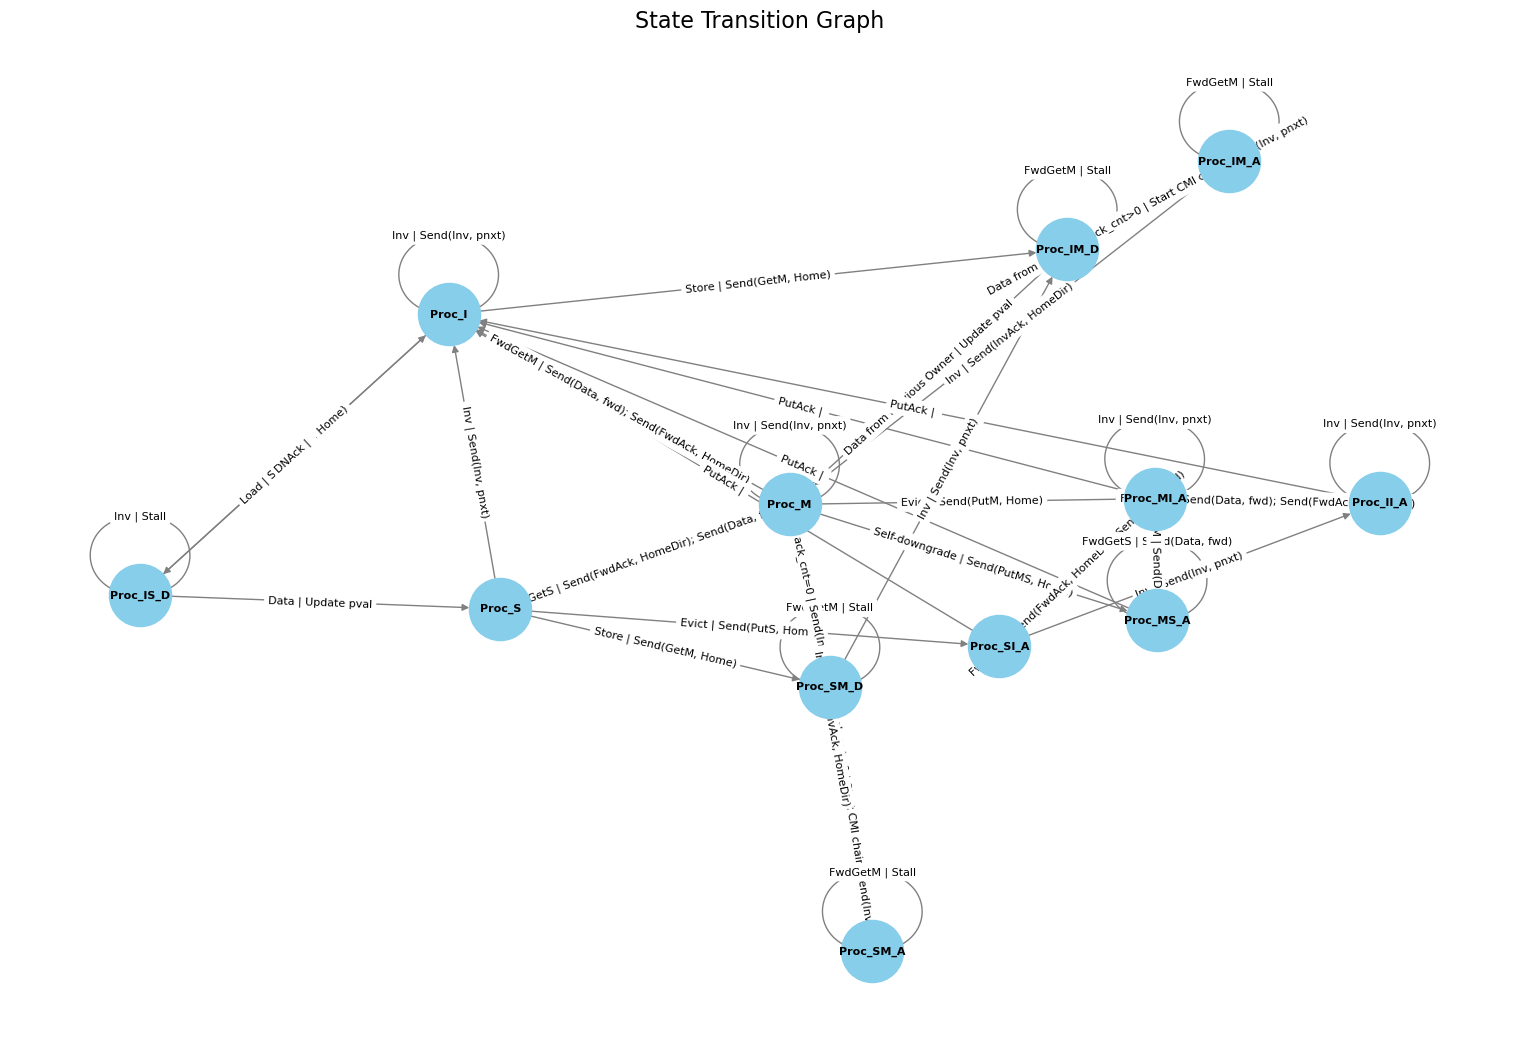

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add transitions to graph
for src, label, action, dest in transitions:
    G.add_edge(src, dest, label=label, action=action)

# Define layout
pos = nx.spring_layout(G, k=1.5, iterations=10000)  # Adjust 'k' for spacing

# Draw nodes and edges
plt.figure(figsize=(15, 10))
# nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw(G, pos, with_labels=True, font_size=8, font_weight='bold', node_size=2000, node_color='skyblue', edge_color='gray')
# nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)

# Draw labels
edge_labels = {
    (u, v): f"{data['label']} | {data['action']}"
    for u, v, data in G.edges(data=True)
}
# nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("State Transition Graph", fontsize=16)
plt.show()
